In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from PIL import Image
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import shutil
import zipfile

!wget https://raw.githubusercontent.com/shayanheidari/tensorflow-deep-learning/main/extras/helper_functions.py

from helper_functions import plot_loss_curves, compare_historys

2024-04-08 09:11:52.325105: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-08 09:11:52.325236: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-08 09:11:52.463657: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


--2024-04-08 09:12:03--  https://raw.githubusercontent.com/shayanheidari/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: 'helper_functions.py'

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0.001s  

2024-04-08 09:12:04 (16.4 MB/s) - 'helper_functions.py' saved [10246/10246]



In [2]:
shutil.copytree("/kaggle/input/traffic-sign-dataset-classification/", "/kaggle/working/data/")

'/kaggle/working/data/'

In [3]:
input_base_path = './data/'
training_folder = 'traffic_Data/DATA'
testing_folder = 'traffic_Data/TEST'
classes = pd.read_csv(os.path.join(input_base_path, 'labels.csv'))
classes_size = len(classes)
print(f"Total number of classes: {classes_size}")
print()
print()
print(classes[:17])

Total number of classes: 58


    ClassId                       Name
0         0        Speed limit (5km/h)
1         1       Speed limit (15km/h)
2         2       Speed limit (30km/h)
3         3       Speed limit (40km/h)
4         4       Speed limit (50km/h)
5         5       Speed limit (60km/h)
6         6       Speed limit (70km/h)
7         7       speed limit (80km/h)
8         8   Dont Go straight or left
9         9  Dont Go straight or Right
10       10           Dont Go straight
11       11               Dont Go Left
12       12      Dont Go Left or Right
13       13              Dont Go Right
14       14    Dont overtake from Left
15       15                   No Uturn
16       16                     No Car


In [4]:
irrelative = [14, 32, 37, 38, 39, 40, 41, 42, 43, 44,45, 46, 47, 48, 49, 50, 51, 52, 53, 56, 57, 1, 8, 9, 10, 13, 15, 18, 19, 20, 21, 22, 23, 25, 27, 29, 31, 33, 34, 36]
# deleting from training data:
for folder_name in os.listdir(os.path.join(input_base_path, training_folder)):
    for irr in irrelative:
        if int(folder_name) == irr:
            shutil.rmtree(os.path.join(input_base_path, training_folder, folder_name))

In [5]:
# deleting from testing data:
for file_name in os.listdir(os.path.join(input_base_path, testing_folder)):
    for irr in irrelative:
        if int(file_name[:3]) == irr:
            os.remove(os.path.join(input_base_path, testing_folder, file_name))

In [6]:
# deleting from labels:
for classs in classes["ClassId"]:
    for irr in irrelative:
        if int(classs) == irr:
            classes.drop(index=irr, axis=0, inplace=True )

In [7]:
try:
    for i in classes["ClassId"]:
        os.mkdir(os.path.join(input_base_path, testing_folder)+f"/{i}")
except: print("folder already exists!!")

try:
    for i in classes["ClassId"]:
        for files in os.listdir(os.path.join(input_base_path, testing_folder)):
            if int(files[:3]) == i:
                shutil.move(os.path.join(input_base_path, testing_folder, files),
                            (os.path.join(input_base_path, testing_folder))+f"/{i}")
except: print("Already moved!!")

In [8]:
classes

,ClassId,Name
0,0,Speed limit (5km/h)
2,2,Speed limit (30km/h)
3,3,Speed limit (40km/h)
4,4,Speed limit (50km/h)
5,5,Speed limit (60km/h)
6,6,Speed limit (70km/h)
7,7,speed limit (80km/h)
11,11,Dont Go Left
12,12,Dont Go Left or Right
16,16,No Car


In [9]:
def view_random_image(target_dir, target_class):
    # Setup the target directory
    target_folder = target_dir+'/'+target_class
    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    # print(random_image)
    # Reading the image and plot it using matplotlib
    img = mpimg.imread(target_folder+"/"+random_image[0])
    plt.imshow(img)
    plt.title(classes["Name"][int(target_class)])
    plt.axis("off")
    # print(f"Image shape: {img.shape}")
    return img

''

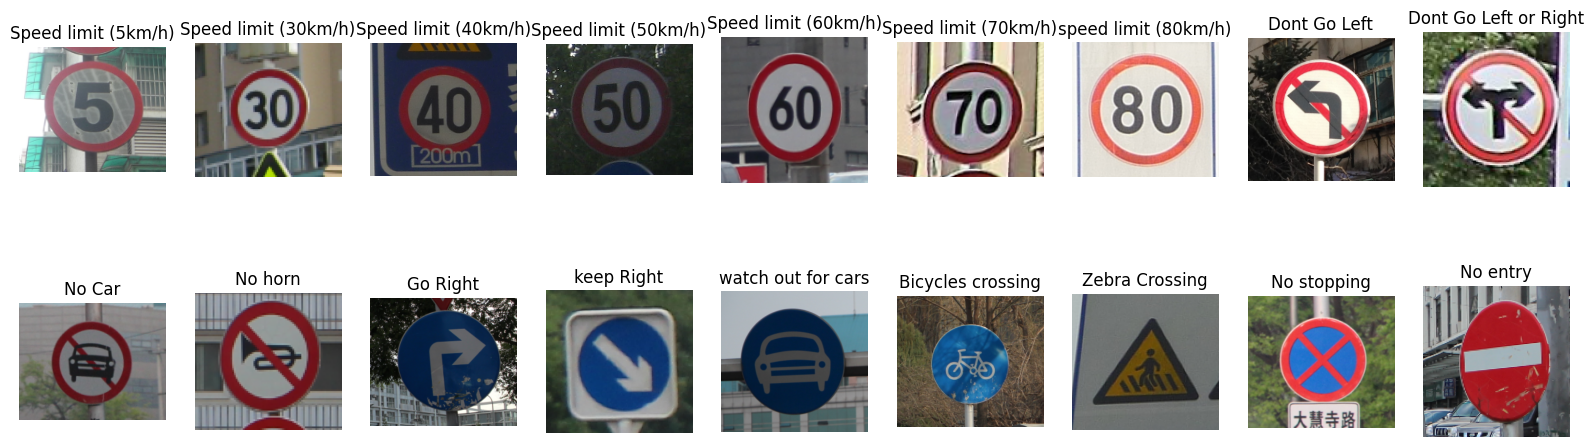

In [10]:
plt.figure(figsize=(20, 6))
plt.subplot(2,9,1)
test = view_random_image(os.path.join(input_base_path, training_folder), "0")
plt.subplot(2,9,2)
test = view_random_image(os.path.join(input_base_path, training_folder), "2")
plt.subplot(2,9,3)
test = view_random_image(os.path.join(input_base_path, training_folder), "3")
plt.subplot(2,9,4)
test = view_random_image(os.path.join(input_base_path, training_folder), "4")
plt.subplot(2,9,5)
test = view_random_image(os.path.join(input_base_path, training_folder), "5")
plt.subplot(2,9,6)
test = view_random_image(os.path.join(input_base_path, training_folder), "6")
plt.subplot(2,9,7)
test = view_random_image(os.path.join(input_base_path, training_folder), "7")
plt.subplot(2,9,8)
test = view_random_image(os.path.join(input_base_path, training_folder), "11")
plt.subplot(2,9,9)
test = view_random_image(os.path.join(input_base_path, training_folder), "12")
plt.subplot(2,9,10)
test = view_random_image(os.path.join(input_base_path, training_folder), "16")
plt.subplot(2,9,11)
test = view_random_image(os.path.join(input_base_path, training_folder), "17")
plt.subplot(2,9,12)
test = view_random_image(os.path.join(input_base_path, training_folder), "24")
plt.subplot(2,9,13)
test = view_random_image(os.path.join(input_base_path, training_folder), "26")
plt.subplot(2,9,14)
test = view_random_image(os.path.join(input_base_path, training_folder), "28")
plt.subplot(2,9,15)
test = view_random_image(os.path.join(input_base_path, training_folder), "30")
plt.subplot(2,9,16)
test = view_random_image(os.path.join(input_base_path, training_folder), "35")
plt.subplot(2,9,17)
test = view_random_image(os.path.join(input_base_path, training_folder), "54")
plt.subplot(2,9,18)
test = view_random_image(os.path.join(input_base_path, training_folder), "55")
;

In [11]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
train_dir = os.path.join(input_base_path, training_folder)
test_dir = os.path.join(input_base_path, testing_folder)

In [12]:
test_datagen = ImageDataGenerator(rescale=1/255.)
train_datagen = ImageDataGenerator(rescale=1/255.,
                                  zoom_range=0.2,
                                  rotation_range=0.2,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2
                                  )
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = IMG_SIZE,
                                               batch_size = BATCH_SIZE)
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = IMG_SIZE,
                                             batch_size = BATCH_SIZE,
                                             shuffle=False)

Found 2950 images belonging to 18 classes.
Found 1200 images belonging to 18 classes.


In [13]:
checkpoint_path = "model_checkpoint.weights.h5"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                         save_weights_only=True,
                                                         monitor="val_accuracy",
                                                         save_best_only=True)

In [31]:
base_model = tf.keras.applications.VGG16(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=(224, 224, 3), name="input_layer")
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D(name = "global_avg_pool")(x)
x = layers.Dense(32, activation="relu")(x)
x = layers.Dense(32, activation="relu")(x)
outputs = layers.Dense(len(set(train_data.classes)),
                       activation = "softmax",
                       name = "output_layer")(x)
model = tf.keras.Model(inputs, outputs)
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_avg_pool                 │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 18)             │           594 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,732,754 (56.20 MB)

 Trainable params: 18,066 (70.57 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [32]:
model.compile(loss= tf.losses.CategoricalCrossentropy(),
             optimizer= tf.optimizers.Adam(),
             metrics= ["accuracy"])

In [34]:
history = model.fit(train_data,
                   epochs = 20,
                   validation_data = test_data,
                   callbacks=[checkpoint_callback, tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                                                    restore_best_weights=True,
                                                                                    verbose=1,
                                                                                    patience=3)])

Epoch 1/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 42s 417ms/step - accuracy: 0.8045 - loss: 21.6610 - val_accuracy: 0.5650 - val_loss: 1.3789
Epoch 2/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 42s 419ms/step - accuracy: 0.8634 - loss: 9.3666 - val_accuracy: 0.5800 - val_loss: 1.4075
Epoch 3/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 42s 419ms/step - accuracy: 0.8610 - loss: 18.9516 - val_accuracy: 0.6083 - val_loss: 1.3301
Epoch 4/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 41s 416ms/step - accuracy: 0.8747 - loss: 16.8077 - val_accuracy: 0.6067 - val_loss: 1.3101
Epoch 5/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 42s 420ms/step - accuracy: 0.8905 - loss: 1.5554 - val_accuracy: 0.5917 - val_loss: 1.3936
Epoch 6/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 42s 421ms/step - accuracy: 0.8942 - loss: 9.1945 - val_accuracy: 0.5883 - val_loss: 1.3656
Epoch 6: early stopping
Restoring model weights from the end of the best epoch: 3.


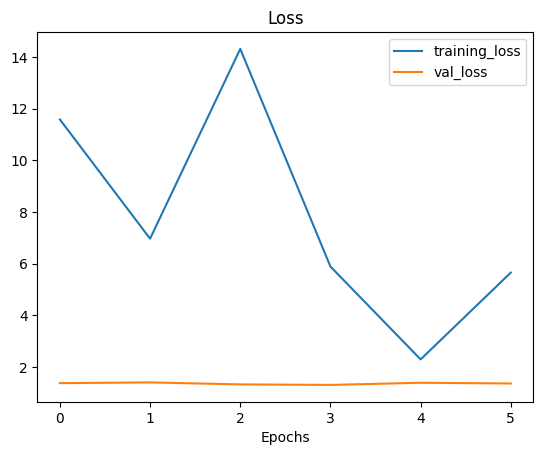

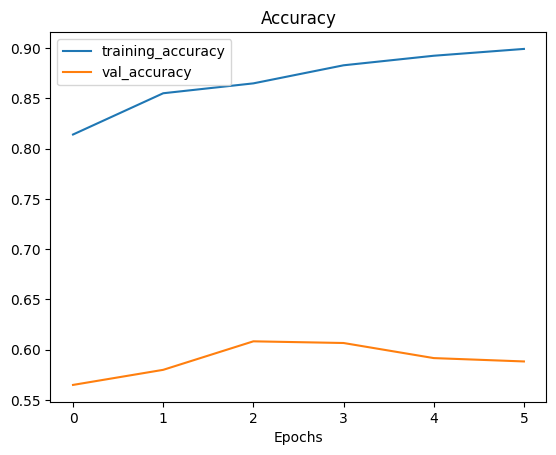

In [35]:
plot_loss_curves(history)

In [36]:
base_model.trainable = True

for layer in base_model.layers[:-5]:
    layer.trainable = False

In [37]:
for layer_number, layer in enumerate(model.layers[1].layers):
    print(layer_number, layer.name, layer.trainable)

0 input_layer_2 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool True
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True


In [38]:
model.compile(loss = "categorical_crossentropy",
             optimizer = tf.optimizers.Adam(learning_rate=0.0001),
             metrics = ["accuracy"])
fine_tune_epochs = 15
history_fine_tune = model.fit(train_data,
                             epochs = fine_tune_epochs,
                             validation_data = test_data,
#                              validation_steps = int(.5 * len(test_data)),
                             initial_epoch=history.epoch[-1],
                             callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                                         restore_best_weights=True,
                                                                         verbose=1,
                                                                         patience=3)])

Epoch 6/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 46s 429ms/step - accuracy: 0.8219 - loss: 7.4518 - val_accuracy: 0.6767 - val_loss: 1.3243
Epoch 7/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 42s 416ms/step - accuracy: 0.9744 - loss: 1.6392 - val_accuracy: 0.7133 - val_loss: 0.9362
Epoch 8/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 42s 420ms/step - accuracy: 0.9049 - loss: 133.9152 - val_accuracy: 0.7183 - val_loss: 1.0998
Epoch 9/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 42s 418ms/step - accuracy: 0.9865 - loss: 1.1341 - val_accuracy: 0.7033 - val_loss: 1.0377
Epoch 10/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 42s 419ms/step - accuracy: 0.9046 - loss: 3.0847 - val_accuracy: 0.7300 - val_loss: 1.2456
Epoch 11/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 42s 417ms/step - accuracy: 0.9692 - loss: 2.3866 - val_accuracy: 0.7817 - val_loss: 1.4528
Epoch 12/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 42s 416ms/step - accuracy: 0.9956 - loss: 0.3590 - val_accuracy: 0.7600 - val_loss: 1.3959
Epoch 13/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 42s 414ms/step - accuracy: 0.9912 - loss: 4.9711 - va

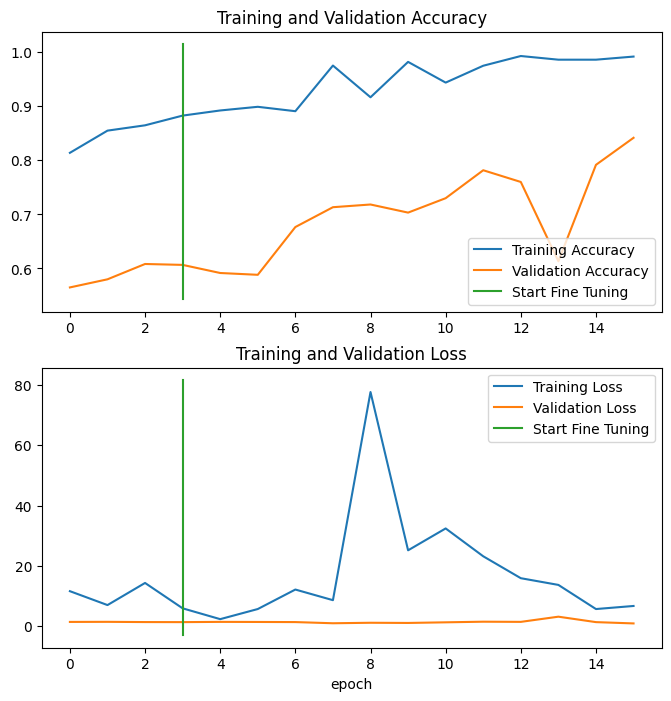

In [39]:
compare_historys(original_history=history,
                new_history=history_fine_tune,
                initial_epochs=4)

In [40]:
model.evaluate(test_data)

38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.8720 - loss: 0.7194


[0.8801994323730469, 0.8416666388511658]